<a href="https://colab.research.google.com/github/Aras1703/Machine-Learning-Submission/blob/main/Tugas_7_Arasy_Bazwir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv('/content/solar_prediction.csv')
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [15]:
data.shape

(32686, 11)

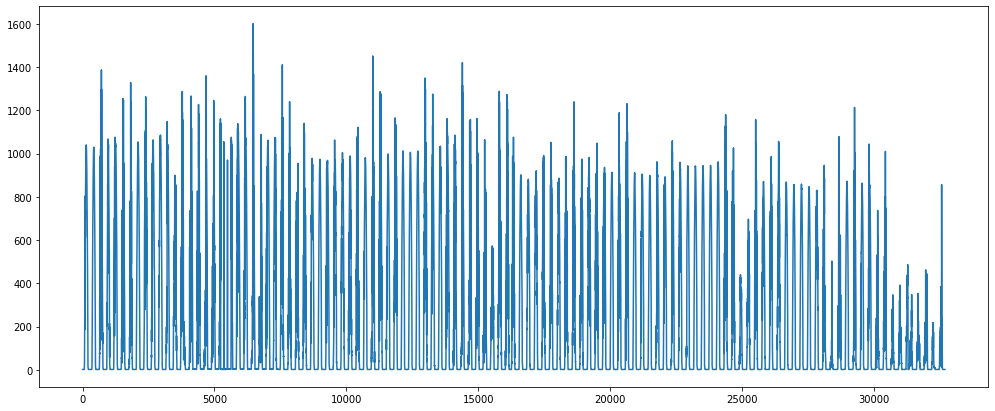

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
data['Radiation'].plot(figsize=(17,7))

In [17]:
final_data=data.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1)
final_data

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75
32682,1.17,44,30.42,102,117.78,6.75
32683,1.20,44,30.42,102,145.19,9.00
32684,1.23,44,30.42,101,164.19,7.87


In [18]:
final_y = final_data.pop('Radiation')
final_y

0        1.21
1        1.21
2        1.23
3        1.21
4        1.17
         ... 
32681    1.22
32682    1.17
32683    1.20
32684    1.23
32685    1.20
Name: Radiation, Length: 32686, dtype: float64

In [19]:
final_x=final_data
final_x

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,48,30.46,59,177.39,5.62
1,48,30.46,58,176.78,3.37
2,48,30.46,57,158.75,3.37
3,48,30.46,60,137.71,3.37
4,48,30.46,62,104.95,5.62
...,...,...,...,...,...
32681,44,30.43,102,145.42,6.75
32682,44,30.42,102,117.78,6.75
32683,44,30.42,102,145.19,9.00
32684,44,30.42,101,164.19,7.87


In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.30, random_state=42)
X_train.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
28075,57,30.49,94,7.95,4.50
23227,64,30.47,32,93.21,9.00
16671,44,30.45,45,337.58,1.12
18527,50,30.44,102,88.19,3.37
2165,52,30.40,34,168.99,7.87


In [21]:
y_train.head()

28075    576.04
23227    939.72
16671     24.17
18527      1.24
2165     233.57
Name: Radiation, dtype: float64

In [22]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
y_pred=final_gb.predict(tesdmat)
y_pred

[12:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([378.88797 , 379.52725 ,  16.736004, ...,  45.726597,  16.736004,
        60.248203], dtype=float32)

In [23]:
y_test

22107     675.86
3780     1286.85
13651       1.23
30473       4.43
9084        1.22
          ...   
30536       1.28
14613       5.62
3288       18.25
29353       1.27
8074       73.52
Name: Radiation, Length: 9806, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error
import math
testScore=math.sqrt(mean_squared_error(y_test.values,y_pred))
testScore

224.53621390030668